
Q1)


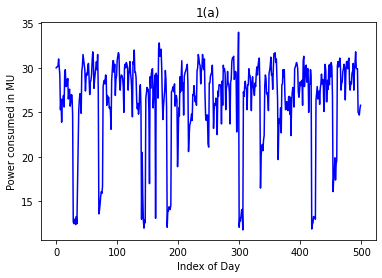


b)
Autocorrelation for 1 day lag =  0.7675012766523849


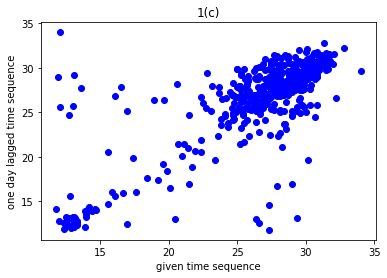


d)
Autocorrelation for 1 day lag =  0.7675012766523849
Autocorrelation for 2 day lag =  0.6027929528346153
Autocorrelation for 3 day lag =  0.44362253115606753
Autocorrelation for 4 day lag =  0.3248490671116213
Autocorrelation for 5 day lag =  0.18435775797011272
Autocorrelation for 6 day lag =  0.06160654041789676
Autocorrelation for 7 day lag =  -0.02619724322893137


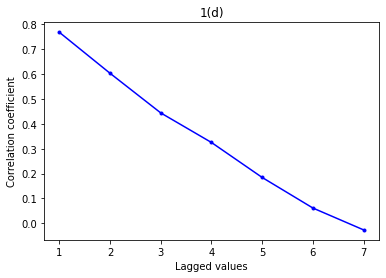

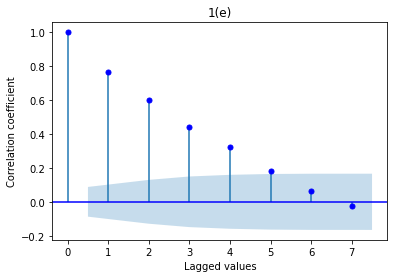


Q2)
Test RMSE:  3.191708006694848

Q3)

a)
Test RMSE :  4.537007584381669


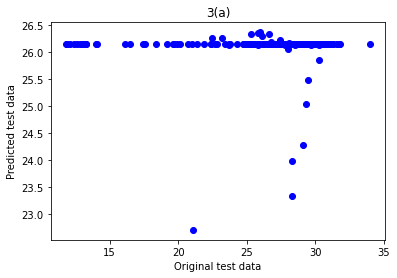


b)
Test RMSE for lag =  1 :  4.536667335444047
Test RMSE for lag =  5 :  4.537007584381669
Test RMSE for lag =  10 :  4.526283621756545
Test RMSE for lag =  15 :  4.555827067010281
Test RMSE for lag =  25 :  4.514130185889034

c)
Heuristic value for optimal no. of lags =  5
Test RMSE for lag =  5 :  4.537007584381669

d)
Table for Optimal no. of lags:
     lags     RMSE 
3.b    25  4.514130
3.c     5  4.537008


In [1]:
# Name- Niveditha N
# Roll no.- B19098

import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error

df = pd.read_csv("datasetA6_HP.csv")
print("\nQ1)")
#a)
plt.plot(df['HP'],c="b")
plt.xlabel('Index of Day')
plt.ylabel('Power consumed in MU')
plt.title("1(a)")
plt.show()
#b)
print('\nb)')
corr_coef=[]
lagval=[]
def cor(lag):       #function to calculate pearson correlation coefficient for given lag
    dfb=pd.concat([df.shift(lag),df],axis=1)    #generating time sequence with given lag
    print("Autocorrelation for",lag,"day lag = ",dfb.corr().values[0][1])
    corr_coef.append(dfb.corr().values[0][1])
    lagval.append(lag)
cor(1)      #for lag=1
#c)
dfc = pd.read_csv("datasetA6_HP.csv",header=0, index_col=0)
plt.scatter(dfc,dfc.shift(1),color='b') #scatter plot for 1.b
plt.xlabel("given time sequence")
plt.ylabel("one day lagged time sequence")
plt.title("1(c)")
plt.show()
#d)
print('\nd)')
corr_coef=[]
lagval=[]
for i in range(1,8):    #autocorrelation for lag=1,2,3....7
    cor(i)
plt.plot(lagval,corr_coef,c='b',marker=".")    #plot between correlation coefficient and lagged values
plt.xlabel('Lagged values')
plt.ylabel('Correlation coefficient')
plt.title('1(d)')
plt.show()
#e)
plot_acf(dfc,c='b',lags=7)      #plotting correlation coefficient using inbuilt plot_acf function
plt.xlabel('Lagged values')
plt.ylabel('Correlation coefficient')
plt.title('1(e)')
plt.show()

print("\nQ2)")
df2=pd.concat([dfc.shift(1),dfc],axis=1)    #persistence model
X = df2.values
train, test = X[0:len(X)-250], X[len(X)-250:]   #spltting last 250 days as test data
test_X, test_y = test[:,0], test[:,1]
predictions = []
for x in test_X:
	predictions.append(x)
print('Test RMSE: ', mean_squared_error(test_y, predictions)**0.5)  #calculating RMSE

print("\nQ3)")
df3 = pd.read_csv('datasetA6_HP.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = df3.values
train, test = X[0:len(X)-250], X[len(X)-250:]   #splitting into train and test data
def AR(l):  #function to generate AR model and calculate RMSE for given lag = l
    model_fit = AutoReg(train, lags=l,old_names=False).fit()
    predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
    print('Test RMSE for lag = ',l,': ',mean_squared_error(test, predictions)**0.5)

#a)
print('\na)')
model_fit = AutoReg(train, lags=5,old_names=False).fit()    #AR model using 5 lag
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
print('Test RMSE : ',mean_squared_error(test, predictions)**0.5)
plt.scatter(test,predictions,c='b') #plot between original and predicted test data
plt.xlabel('Original test data')
plt.ylabel('Predicted test data')
plt.title('3(a)')
plt.show()
#b)
print('\nb)')
for l in [1,5,10,15,25]:    
    AR(l)       #calling AR() function for l=1,5,10,15,25
#c)
print('\nc)')
def corr(lag):   #function to calculate autocorrelation for given lag
    df3c=pd.concat([dfc.shift(lag),dfc],axis=1)
    return abs(df3c.corr().values[0][1])
lag=1
#computing optimal value of lag s.t. abs(AutoCorrelation)>2/sqrt(T)
while(True):
    if corr(lag) <= 2/len(train)**0.5:
        lag-=1
        break
    else:
        lag+=1
print("Heuristic value for optimal no. of lags = ",lag)
AR(lag) #calling AR() to print RMSE for optimal no. of lags
#d)
print('\nd)')
print('Table for Optimal no. of lags:') #comparing optimal no. of lags in part 3.b and 3.c
print(pd.DataFrame([ [25,4.514130185889046],[5,4.537007584381681]],index=['3.b','3.c'],columns=['lags','RMSE ']))